#Eletrocardiograma

https://timeseriesclassification.com/description.php?Dataset=ECG200

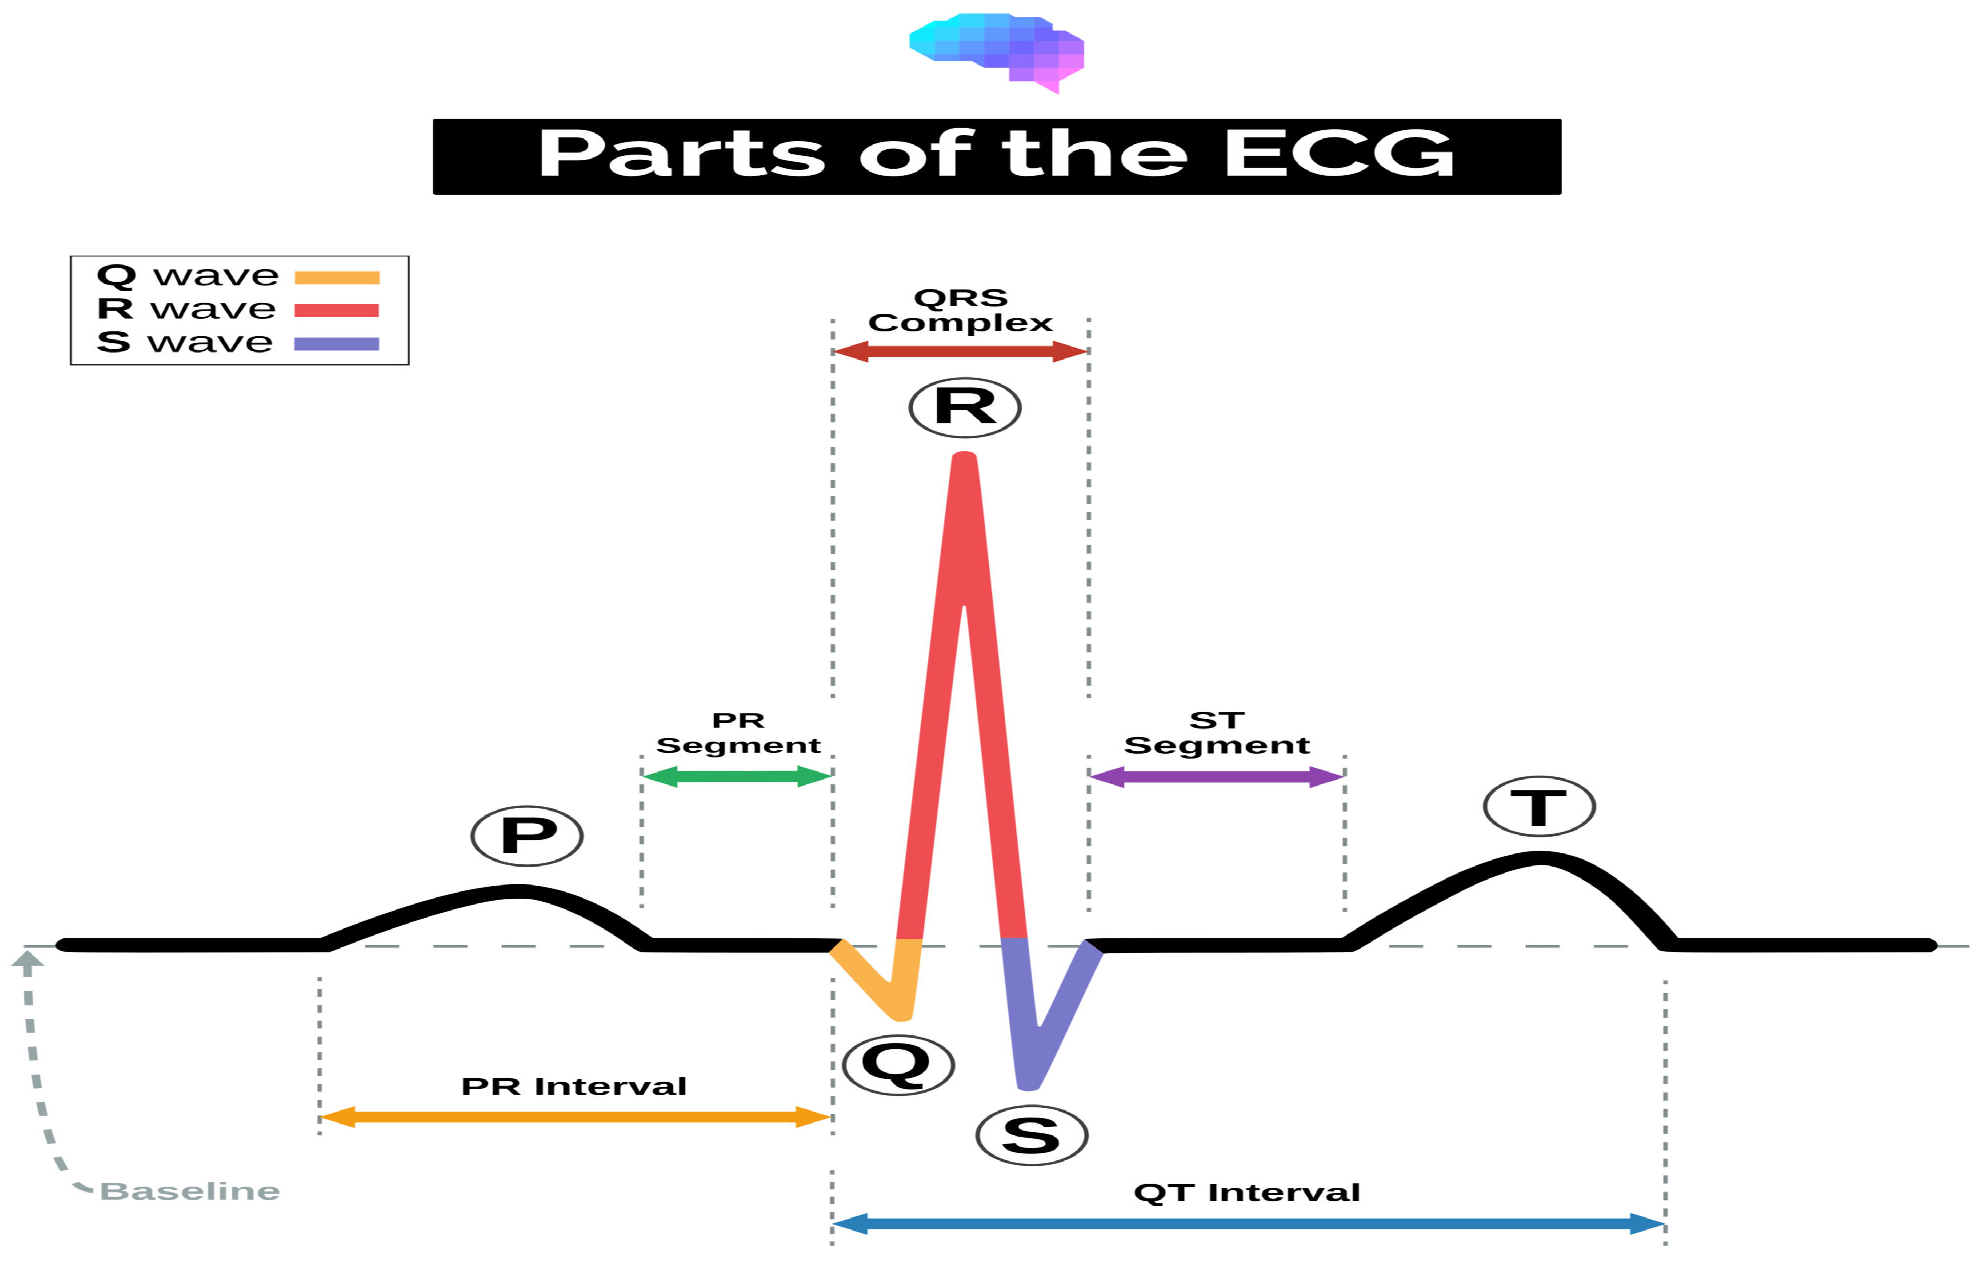

Batimento cardíaco normal = 1

Infarto do Miocárdio = -1

In [ ]:
pip install pyts

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pyts.image import GramianAngularField
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, f1_score, confusion_matrix, roc_curve, auc

# Setar semente
seed = 1
np.random.seed(seed)
random.seed(seed)

In [ ]:
# Função para carregar dados do arquivo .txt
def load_txt(filename):
    data = pd.read_csv(filename, delim_whitespace=True, header=None)
    labels = data.iloc[:, 0]
    data = data.iloc[:, 1:]
    return data, labels

In [ ]:
# Caminhos para os arquivos de dados
train_file = 'ECG200_TRAIN.txt'
test_file = 'ECG200_TEST.txt'

# Carregar dados de treinamento e teste
X_train, y_train = load_txt(train_file)
X_test, y_test = load_txt(test_file)

# Verificar as formas dos dados carregados
print(f"Shape de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape de X_train: (100, 96), y_train: (100,)
Shape de X_test: (100, 96), y_test: (100,)


In [ ]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


In [ ]:
y_train.head()

0   -1.0
1    1.0
2   -1.0
3   -1.0
4    1.0
Name: 0, dtype: float64

In [ ]:
y_train.value_counts()

0
 1.0    69
-1.0    31
Name: count, dtype: int64

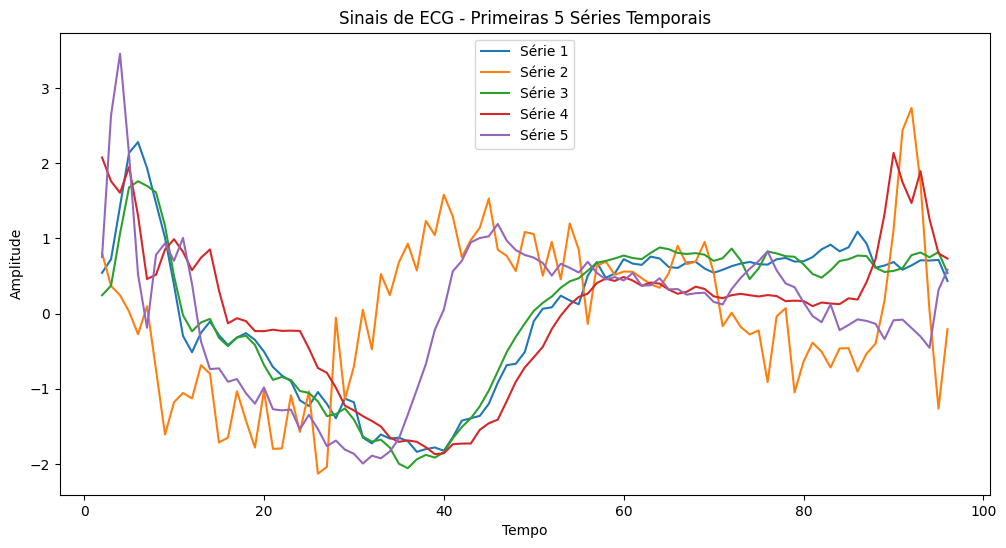

In [ ]:
# Gráfico de Linha para as primeiras 5 séries temporais
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(X_train.iloc[i, 1:], label=f'Série {i+1}')
plt.title('Sinais de ECG - Primeiras 5 Séries Temporais')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

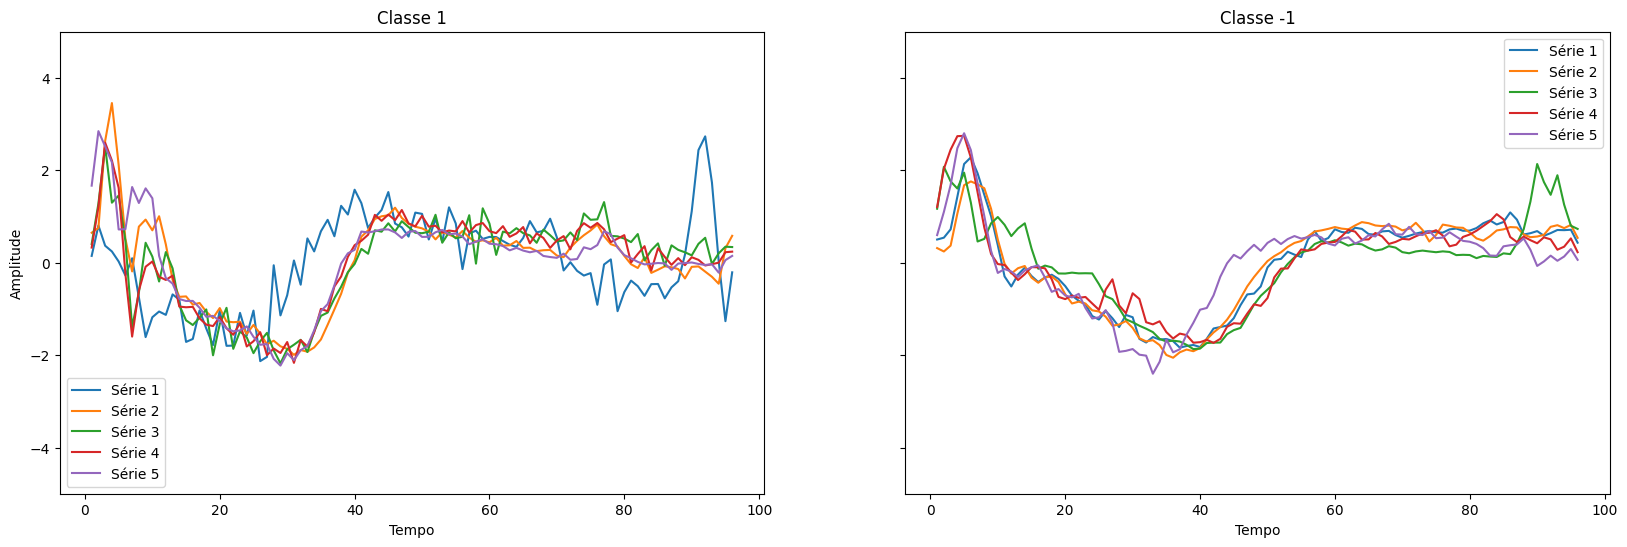

In [ ]:
# Filtrar dados por classe
class_1 = X_train[y_train == 1]
class_minus_1 = X_train[y_train == -1]

# Plotar os gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

# Gráfico para a classe 1
for i in range(5):
    axes[0].plot(class_1.iloc[i], label=f'Série {i+1}')
axes[0].set_title('Classe 1')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Amplitude')
axes[0].legend()
axes[0].set_ylim(-5, 5)

# Gráfico para a classe -1
for i in range(5):
    axes[1].plot(class_minus_1.iloc[i], label=f'Série {i+1}')
axes[1].set_title('Classe -1')
axes[1].set_xlabel('Tempo')
axes[1].legend()
axes[1].set_ylim(-5, 5)

plt.show()

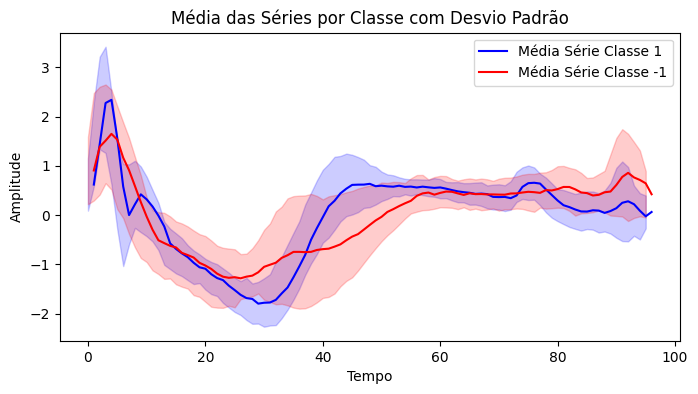

In [ ]:
#  calcular a média
class_1_mean = class_1.mean(axis=0)
class_1_std = class_1.std(axis=0)
class_minus_1_mean = class_minus_1.mean(axis=0)
class_minus_1_std = class_minus_1.std(axis=0)

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)
plt.figure(figsize=(8, 4))

# Gráfico para a classe 1 (média e desvio padrão)
plt.plot(class_1_mean, label='Média Série Classe 1', color='b')
plt.fill_between(range(len(class_1_mean)), class_1_mean - class_1_std, class_1_mean + class_1_std, color='b', alpha=0.2)

plt.plot(class_minus_1_mean, label='Média Série Classe -1', color='r')
plt.fill_between(range(len(class_minus_1_mean)), class_minus_1_mean - class_minus_1_std, class_minus_1_mean + class_minus_1_std, color='r', alpha=0.2)


plt.title('Média das Séries por Classe com Desvio Padrão')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()

plt.legend()

plt.show()

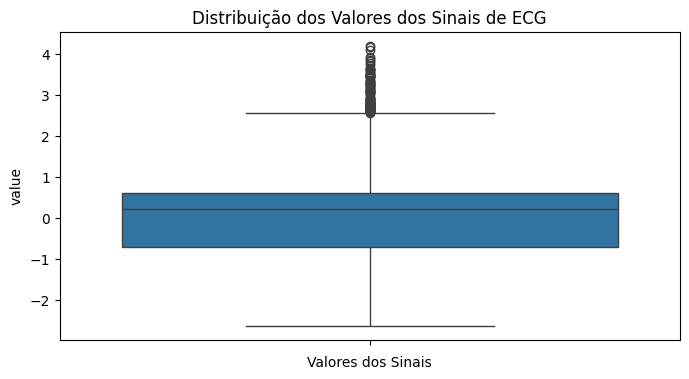

In [ ]:
# Boxplot para a distribuição dos valores dos sinais
plt.figure(figsize=(8, 4))
sns.boxplot(data=X_train.iloc[:, 1:].melt()['value'])
plt.title('Distribuição dos Valores dos Sinais de ECG')
plt.xlabel('Valores dos Sinais')
plt.show()

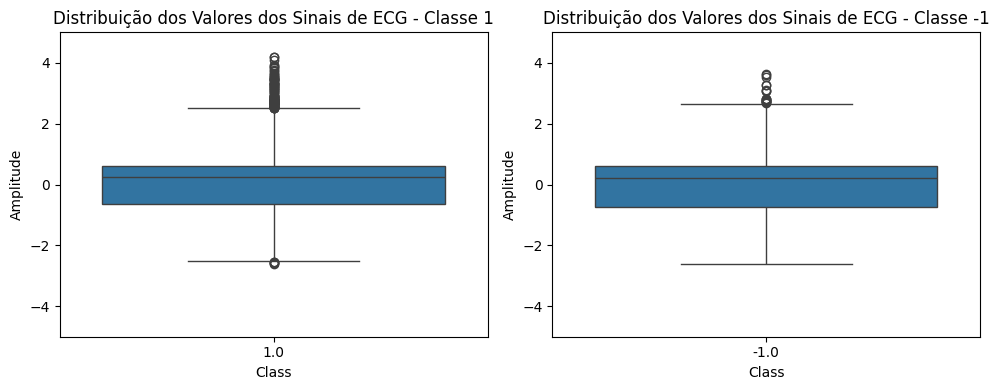

In [ ]:
# Converter para DataFrame e adicionar a coluna de classes
df = pd.DataFrame(X_train)
df['Class'] = y_train

# Transformar os dados para formato longo (melt)
df_melted = df.melt(id_vars=['Class'], var_name='Time', value_name='Amplitude')

# Plotar os boxplots
plt.figure(figsize=(10, 4))

# Boxplot para a classe 1
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amplitude', data=df_melted[df_melted['Class'] == 1])
plt.title('Distribuição dos Valores dos Sinais de ECG - Classe 1')
plt.ylim(-5, 5)

# Boxplot para a classe -1
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amplitude', data=df_melted[df_melted['Class'] == -1])
plt.title('Distribuição dos Valores dos Sinais de ECG - Classe -1')
plt.ylim(-5, 5)

plt.tight_layout()
plt.show()

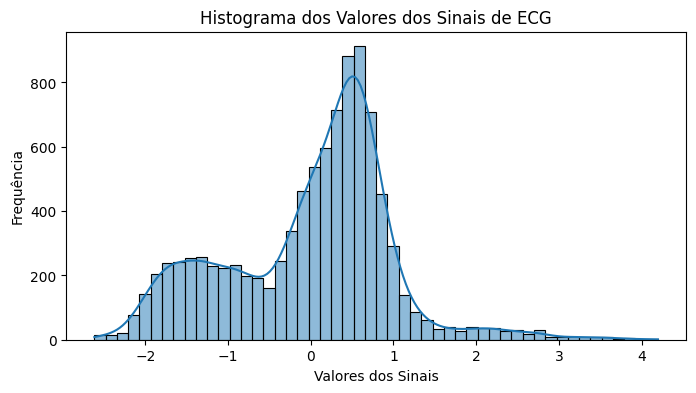

In [ ]:
# Histograma para a distribuição dos valores ao longo das séries temporais
plt.figure(figsize=(8, 4))
sns.histplot(X_train.iloc[:, 1:].values.flatten(), bins=50, kde=True)
plt.title('Histograma dos Valores dos Sinais de ECG')
plt.xlabel('Valores dos Sinais')
plt.ylabel('Frequência')
plt.show()

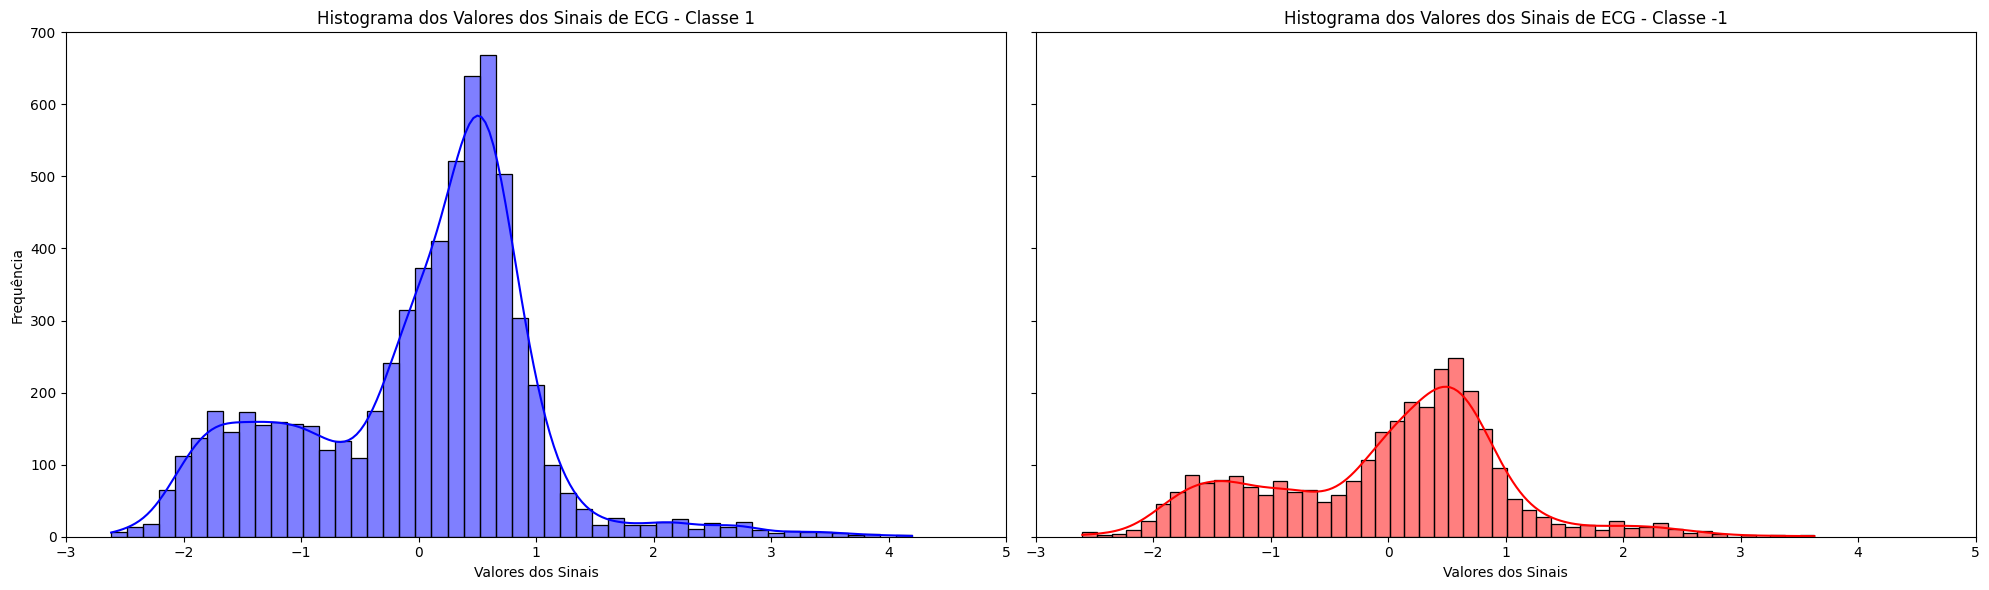

In [ ]:
# Plotar os histogramas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

# Histograma para a classe 1
sns.histplot(class_1.values.flatten(), bins=50, kde=True, ax=axes[0], color='b')
axes[0].set_title('Histograma dos Valores dos Sinais de ECG - Classe 1')
axes[0].set_xlabel('Valores dos Sinais')
axes[0].set_ylabel('Frequência')
axes[0].set_ylim(0, 700)
axes[0].set_xlim(-3, 5)

# Histograma para a classe -1
sns.histplot(class_minus_1.values.flatten(), bins=50, kde=True, ax=axes[1], color='r')
axes[1].set_title('Histograma dos Valores dos Sinais de ECG - Classe -1')
axes[1].set_xlabel('Valores dos Sinais')
axes[1].set_ylim(0, 700)
axes[1].set_xlim(-3, 5)

plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(y_train).value_counts()

 1.0    69
-1.0    31
Name: count, dtype: int64

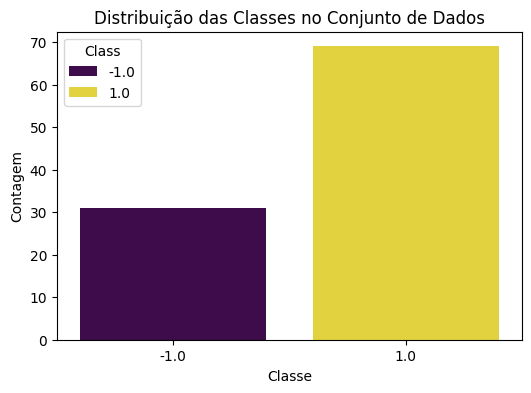

In [ ]:
# Contar as classes
class_counts = pd.Series(y_train).value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Plotar o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', hue='Class', data=class_counts, palette='viridis')
plt.title('Distribuição das Classes no Conjunto de Dados')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

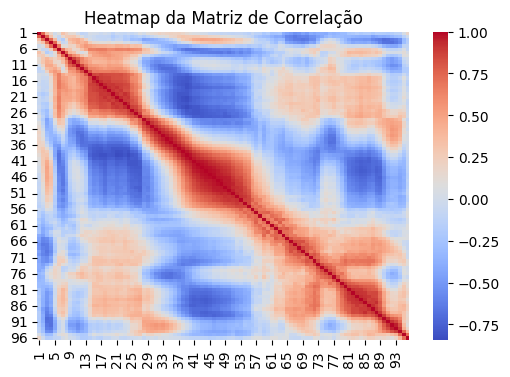

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = X_train.corr()

# Plotar o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap da Matriz de Correlação')
plt.show()

Redundância nos dados

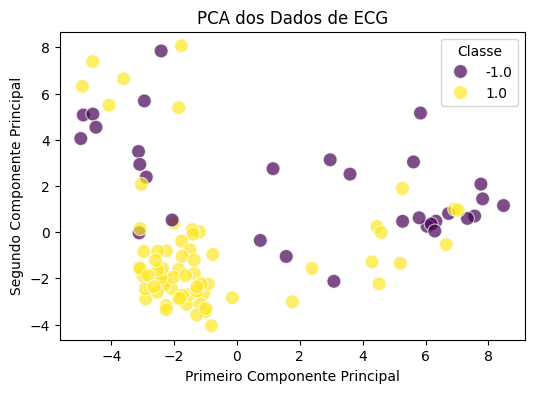

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Converter os resultados do PCA em um DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y_train

# Plotar o gráfico de dispersão
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA dos Dados de ECG')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Classe')
plt.show()

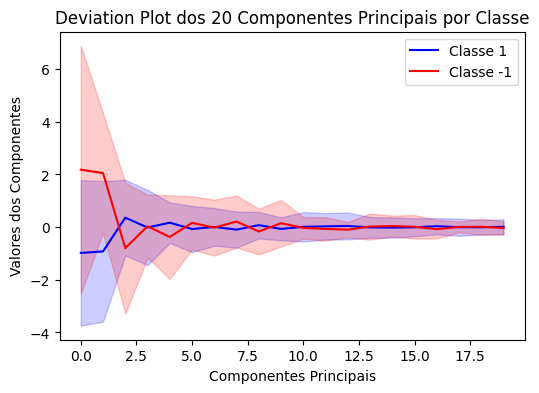

In [ ]:
# Aplicar PCA com 20 componentes
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_train)

# Converter os resultados do PCA em um DataFrame e adicionar a coluna de classes
pca_df = pd.DataFrame(X_pca)
pca_df['Class'] = y_train

# Calcular a média e o desvio padrão por classe
mean_class_1 = pca_df[pca_df['Class'] == 1].iloc[:, :-1].mean(axis=0)
std_class_1 = pca_df[pca_df['Class'] == 1].iloc[:, :-1].std(axis=0)

mean_class_minus_1 = pca_df[pca_df['Class'] == -1].iloc[:, :-1].mean(axis=0)
std_class_minus_1 = pca_df[pca_df['Class'] == -1].iloc[:, :-1].std(axis=0)

# Plotar o deviation plot
plt.figure(figsize=(6, 4))
x = range(len(mean_class_1))

# Plotar para a classe 1
plt.plot(x, mean_class_1, label='Classe 1', color='b')
plt.fill_between(x, mean_class_1 - std_class_1, mean_class_1 + std_class_1, color='b', alpha=0.2)

# Plotar para a classe -1
plt.plot(x, mean_class_minus_1, label='Classe -1', color='r')
plt.fill_between(x, mean_class_minus_1 - std_class_minus_1, mean_class_minus_1 + std_class_minus_1, color='r', alpha=0.2)

plt.title('Deviation Plot dos 20 Componentes Principais por Classe')
plt.xlabel('Componentes Principais')
plt.ylabel('Valores dos Componentes')
plt.legend()
plt.show()

In [ ]:
# Concatenar os dados de treinamento e teste para a transformação GAF
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Transformar séries temporais em imagens GAF
length = X.shape[1]
gaf = GramianAngularField(image_size=length)
images_gaf = gaf.fit_transform(X)

# Verificar as formas das imagens GAF
print(f"Shape das imagens GAF: {images_gaf.shape}")

Shape das imagens GAF: (200, 96, 96)


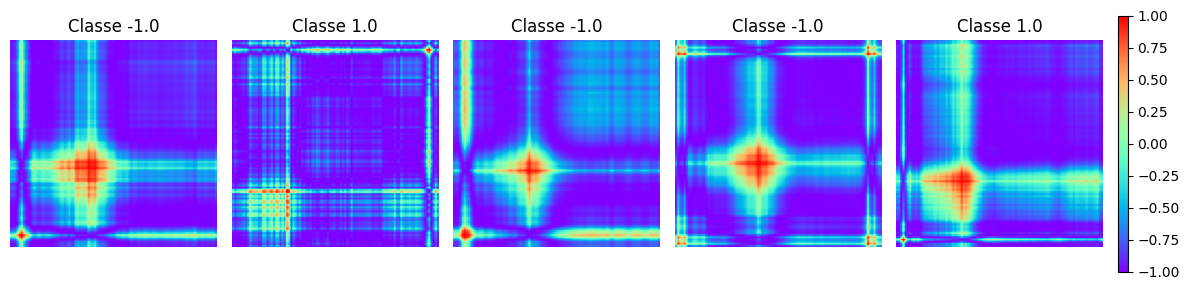

In [ ]:
# Visualizar algumas imagens GAF
fig, axes = plt.subplots(1, 6, figsize=(12, 3), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 0.05]})

for i in range(5):
    im = axes[i].imshow(images_gaf[i], cmap='rainbow', origin='lower')
    axes[i].set_title(f'Classe {y[i]}')
    axes[i].axis('off')

cbar = fig.colorbar(im, cax=axes[-1])
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

**Identificar Diferenças Chave (Padrões, Texturas, Simetria, Repetição, Contraste, Distribuição de Cor, Padrões nas Áreas Centrais e Bordas, etc.)**

**Texturas e Densidades:**

- Verifique se há diferenças nas texturas e densidades das imagens entre as duas classes. Imagens mais "densas" ou com mais cruzamentos podem indicar maior variação nos sinais de ECG.

**Intensidade de Cores:**

- Analise as intensidades de cores nas imagens. Cores mais intensas podem indicar maior correlação angular em certas partes do sinal.

**Comparação de Imagens:**

Compare as imagens da Classe 1.0 e Classe -1.0 para ver se uma classe tem padrões mais caóticos ou mais ordenados, o que pode refletir a regularidade ou irregularidade dos batimentos cardíacos.

In [ ]:
# Dividir os dados novamente em treinamento e teste
X_train_gaf, X_test_gaf = images_gaf[:len(y_train)], images_gaf[len(y_train):]

print(f"Shape de X_train: {X_train_gaf.shape}, y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test_gaf.shape}, y_test: {y_test.shape}")

Shape de X_train: (100, 96, 96), y_train: (100,)
Shape de X_test: (100, 96, 96), y_test: (100,)


In [ ]:
# Flatten dos pixels para Random Forest (Mais para frente utilizaremos CNNs e Transformers diretamente nos dados 2D ou até 3D de imagens)
X_train_gaf = X_train_gaf.reshape(X_train_gaf.shape[0], -1)
X_test_gaf = X_test_gaf.reshape(X_test_gaf.shape[0], -1)

print(f"Shape de X_train: {X_train_gaf.shape}, y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test_gaf.shape}, y_test: {y_test.shape}")

Shape de X_train: (100, 9216), y_train: (100,)
Shape de X_test: (100, 9216), y_test: (100,)


In [ ]:
# Treinar o modelo Random Forest
def train(X_train, y_train, n_estimators=100):
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  return model

model = train(X_train_gaf, y_train)

Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.78      0.78      0.78        36
         1.0       0.88      0.88      0.88        64

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



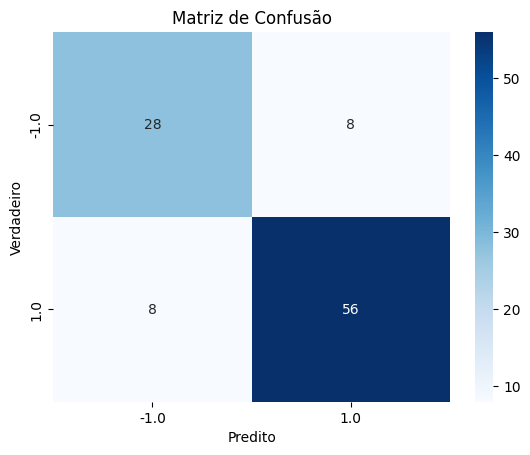

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_gaf)

# Avaliar o modelo
def evaluate(y_test, y_pred):

  print("Relatório de Classificação:")
  print(classification_report(y_test, y_pred))

  # Plotar matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

evaluate(y_test, y_pred)

Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.72      0.72      0.72        36
         1.0       0.84      0.84      0.84        64

    accuracy                           0.80       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.80      0.80      0.80       100



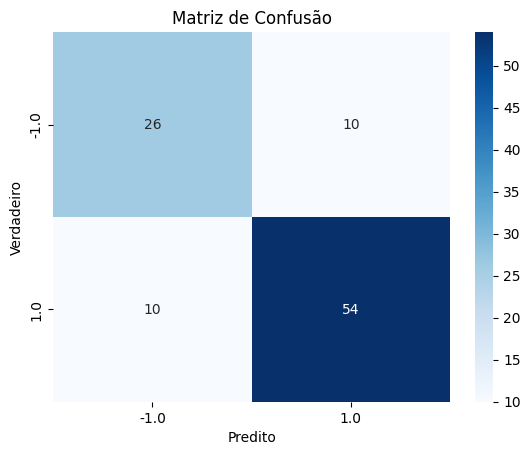

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Seleção de atributos com base no ganho de informação
k = 4000  # Número de atributos a serem selecionados
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_gaf_selected = selector.fit_transform(X_train_gaf, y_train)
X_test_gaf_selected = selector.transform(X_test_gaf)

# Treinar o modelo Random Forest
model = train(X_train_gaf_selected, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_gaf_selected)

# Avaliar o modelo
evaluate(y_test, y_pred)

#Para Praticar:

1. Usar PCA ao invés de ganho de informação para redução de dimensionalidade
2. Avaliar outros pontos de corte na seleção das features
3. Avaliar outros modelos de Machine Learning (Clássicos, por enquanto)
4. Tuning de hyperparâmetros
5. Avaliar Curva ROC